In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Train Test Split

In [4]:
# # Creating Train / Val / Test folders (One time use)
import os
import numpy as np
import shutil
import random

root_dir = '/content/drive/MyDrive/'  # data root path
#data_path = 'images'
path = '/content/drive/MyDrive/images'
classes_dir = os.listdir(path)
print(classes_dir)
test_ratio = 0.05

for cls in classes_dir:
    os.makedirs(root_dir + 'dataset/train/' + cls)
    os.makedirs(root_dir + 'dataset/test/' + cls)
    
    src = path + '/' + cls
    allFileNames = os.listdir(src)
    np.random.shuffle(allFileNames)

    train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                               [int(len(allFileNames) * (1 - test_ratio))])

    train_FileNames = [src + '/' + name for name in train_FileNames.tolist()]
    test_FileNames = [src + '/' + name for name in test_FileNames.tolist()]

    # Copy-pasting images
    for name in train_FileNames:
        shutil.copy(name, root_dir + 'dataset/train/' + cls)

    for name in test_FileNames:
        shutil.copy(name, root_dir + 'dataset/test/' + cls)

['saad', 'nawaf']


58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
2/2 [==============================] - 32s 14s/step - loss: 1.5291 - accuracy: 0.4107 - val_loss: 0.7121 - val_accuracy: 0.5000
Epoch 2/5
2/2 [==============================] - 31s 18s/step - loss: 0.7603 - accuracy: 0.5000 - val_loss: 1.1561 - val_accuracy: 0.5000
Epoch 3/5
2/2 [==============================] - 31s 14s/step - loss: 0.9280 - accuracy: 0.5000 - val_loss: 0.1817 - val_accuracy: 1.0000
Epoch 4/5
2/2 [==============================] - 31s 14s/step - loss: 0.1898 - accuracy: 0.9821 - val_loss: 0.2317 - val_accuracy: 1.0000
Epoch 5/5
2/2 [==============================] - 31s 18s/step - loss: 0.3273 - accuracy: 0.8214 - val_loss: 0.1368 - val_accuracy: 1.0000


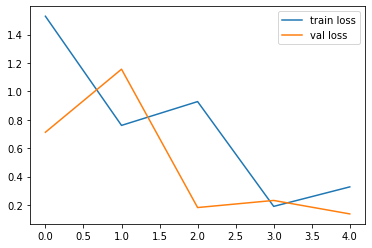

<Figure size 432x288 with 0 Axes>

In [5]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/dataset/train'
valid_path = '/content/drive/MyDrive/dataset/test'

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('/content/drive/MyDrive/dataset/train/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 shuffle = True,
                                                 seed = 42)

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            shuffle = True,
                                            seed = 42)

'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')



import tensorflow as tf

from keras.models import load_model


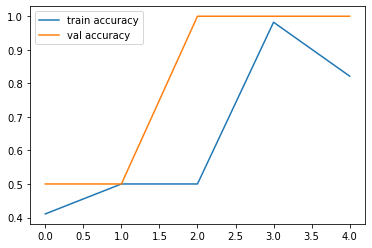

<Figure size 432x288 with 0 Axes>

In [6]:
# accuracies
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [7]:
model.save('face_verfication.h5')